# HW 4
## Parker George
### February 14, 2025

# Problem 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

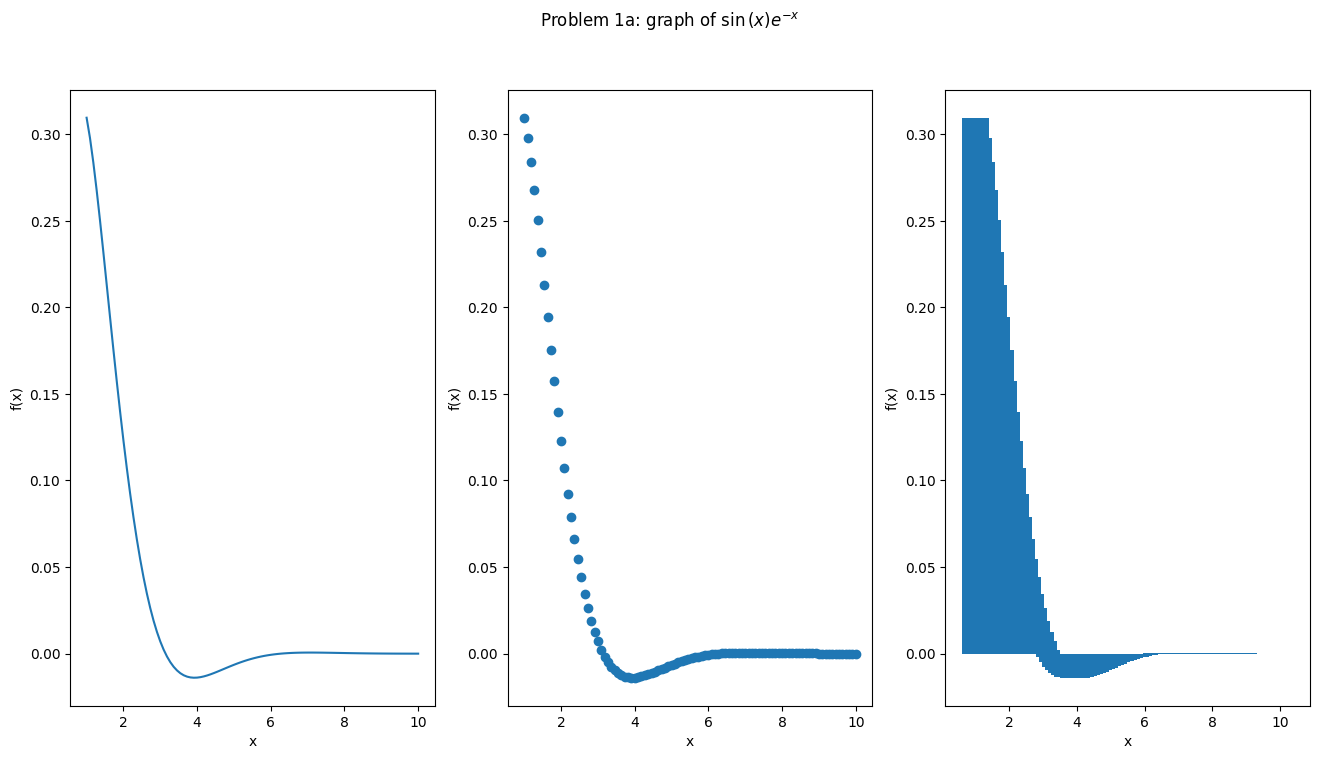

In [3]:
def func1a(x):
    return np.sin(x) * np.exp(-x)

x = np.linspace(1.0, 10.0, 100)
fig, ax = plt.subplots(ncols=3)

ax[0].plot(x, func1a(x))
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[1].scatter(x, func1a(x))
ax[1].set_xlabel('x')
ax[1].set_ylabel('f(x)')
ax[2].bar(x, func1a(x))
ax[2].set_xlabel('x')
ax[2].set_ylabel('f(x)')
fig.set_size_inches(16, 8)
plt.suptitle(r'Problem 1a: graph of $\sin{(x)}e^{-x}$')
plt.show()

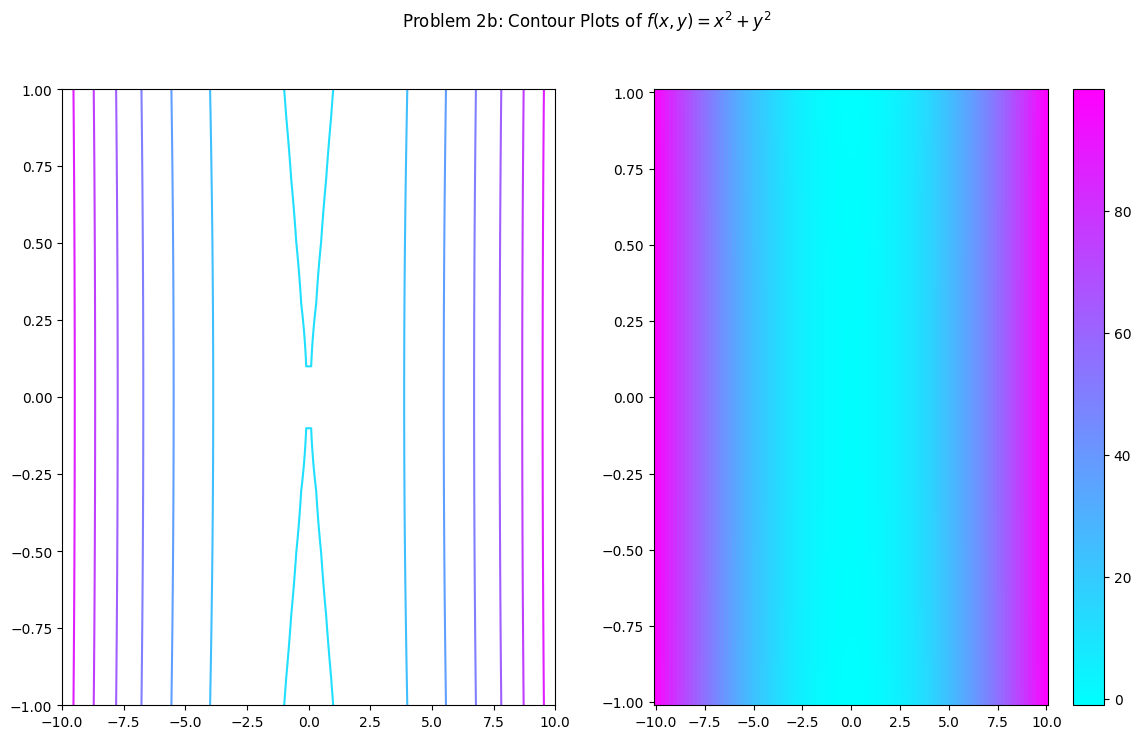

In [15]:
def func1b(x,y):
    z = x**2 - y**2
    return z

x = np.linspace(-10.0, 10.0, 100)
y = np.linspace(-1.0, 1.0, 100)

X, Y = np.meshgrid(x, y, indexing='ij')
Z = func1b(X, Y)
fig, ax = plt.subplots(ncols=2)
C1 = ax[0].contour(X, Y, Z, cmap='cool')
C2 = ax[1].pcolor(X, Y, Z, cmap='cool')
fig.colorbar(C2)
fig.set_size_inches(14, 8)
fig.suptitle(r'Problem 2b: Contour Plots of $f(x,y) = x^{2} - y^{2}$')
plt.show()


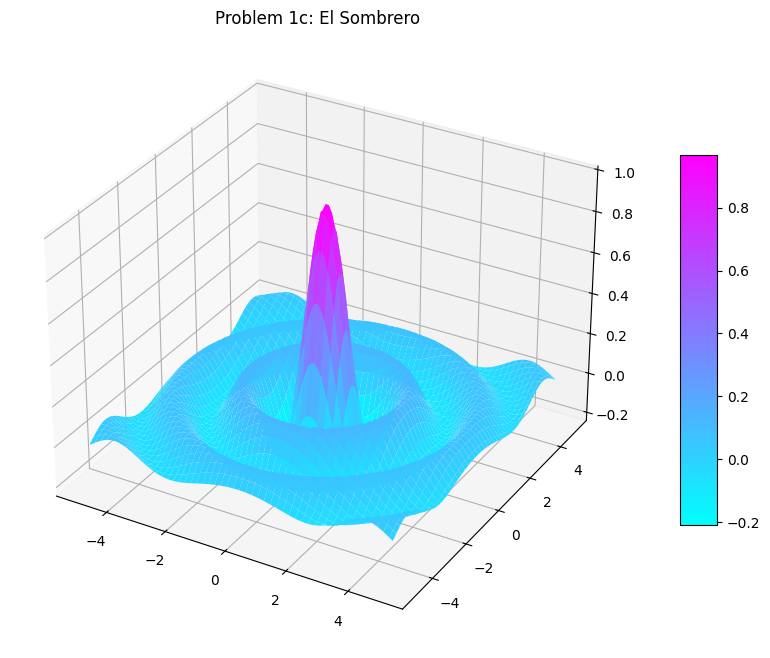

In [33]:
def func1c(x,y):
    r = np.sqrt(x**2 + y**2)
    z = np.sinc(r)
    return z

x = np.linspace(-5.0, 5.0, 100)
y = np.linspace(-5.0,5.0, 100)

X,Y = np.meshgrid(x, y, indexing='ij')
Z = func1c(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
somb = ax.plot_surface(X, Y, Z, cmap='cool')
fig.colorbar(somb, shrink=0.6 ,aspect=10)
fig.set_size_inches(14, 8)
plt.title('Problem 1c: El Sombrero')
plt.show()

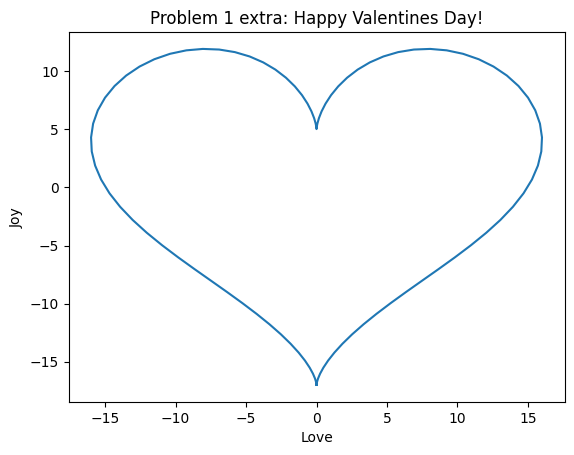

In [34]:
def happy_valentines_day(t):
    x = 16*np.sin(t)**3
    y = 13*np.cos(t) - 5*np.cos(2*t) - 2*np.cos(3*t) - np.cos(4*t)
    return x,y

t = np.linspace(-np.pi, np.pi, 100)
x, y = happy_valentines_day(t)

plt.plot(x, y)
plt.xlabel('Love')
plt.ylabel('Joy')
plt.title('Problem 1 extra: Happy Valentines Day!')
plt.show()


# Problem 2

the ax.pie function takes in an array like for the values of the pie chart, and then the labels argument takes in strings in the same order that the array like is in. Autopct auto generates the percentage in a float of what percentage of the total the value holds. Colors takes a list of string colors and auto combines them with the same index in the list of values/labels.

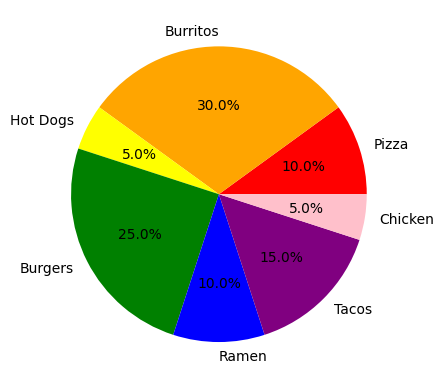

In [42]:
labels = 'Pizza', 'Burritos', 'Hot Dogs', 'Burgers', 'Ramen', 'Tacos', 'Chicken'
values = [10, 30, 5, 25, 10, 15, 5]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink']

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', colors=colors)
plt.show()

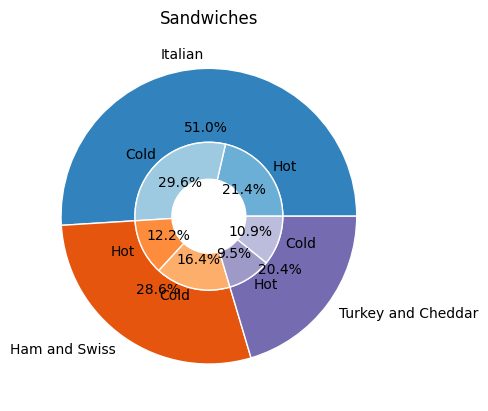

In [73]:
# Nested Pie Chart
fig, ax = plt.subplots()

size = 0.5

vals = np.array([[65., 90.], [37., 50.], [29., 33.]])

tab20c = plt.color_sequences['tab20c']
outer = [tab20c[i] for i in [0,4,12]]
inner = [tab20c[i] for i in [1,2,5,6,13,14]]

outer_labels = 'Italian', 'Ham and Swiss', 'Turkey and Cheddar'
inner_labels = 'Hot', 'Cold','Hot', 'Cold','Hot', 'Cold'
ax.pie(vals.sum(axis=1), radius=1, autopct='%1.1f%%', colors=outer, wedgeprops=dict(width=size, edgecolor='w'), labels=outer_labels)
ax.pie(vals.flatten(), radius=1-size, colors=inner, wedgeprops=dict(width=size/2, edgecolor='w'), labels=inner_labels)

ax.set(aspect='equal', title='Sandwiches')
plt.show()


## Bar Plot in Polar Coordinates
Take the same values as the other pie chart, but we normalize the values to radians (polar coordinates), we then find the end of the next bar chart so that the circle is seamless. We get the cummulative sum of the normalized values and find the end of each string of values, and then reshape the values array. Colors are then projected the same way, except for a np.arange to cycle through the first needed values.

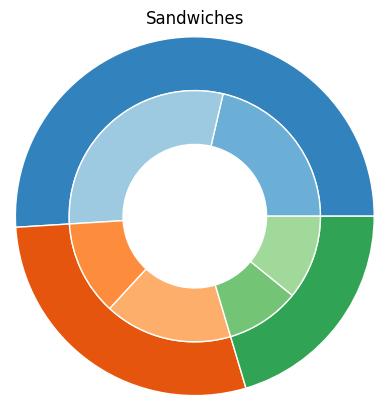

In [77]:
# Bar Plot in Polar Coordinates
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))

size = 0.3
vals = np.array([[65., 90.], [37., 50.], [29., 33.]])
# normalize the values to 2pi in order to rotate the bar plot in a circle
valsnorm = vals/np.sum(vals)*2*np.pi
# Find the end of the last bar plot
valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

cmap = plt.colormaps['tab20c']
outer = cmap(np.arange(3)*4)
inner = cmap([1,2,5,6,9,10])

ax.bar(x=valsleft[:, 0], width=valsnorm.sum(axis=1), bottom=1-size, height=size, color=outer, edgecolor='w', align='edge',linewidth=1)

ax.bar(x=valsleft.flatten(), width=valsnorm.flatten(), bottom=1-2*size, height=size, color=inner, edgecolor='w', linewidth=1, align="edge")

ax.set_title('Sandwiches')
ax.set_axis_off()
plt.show()

# Problem 3